In [ ]:
# analyzing HPC amyloid, microglia after RLP treatment (blind)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wesanderson
import os
import re
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [91]:
def get_tiny_df(file_path, cols, iid_channel=None):
    """
    Returns a df with one row, corresponding to the amyloid/microglia/astrocyte
    data for a single image.
    """
    
    df = pd.read_csv(file_path, header=2, index_col=0)
    idx = re.search(r'\d+_?[MF]_?sliceB(\d+)', file_path).group(0)
    gender = 'M' if '_M_' in idx else 'F'

    if iid_channel is None:
        # just get the volume
        vol = df.loc['Volume']['Sum']
        vals = [idx, gender, vol]
        
    else:
        # get surface, iid data
        num_cells = df.loc['Number of Disconnected Components']['Count']
        vol = df.loc['Volume']['Sum']
        sa = df.loc['Area']['Sum']
    
        df = df[df['Channel'] == iid_channel]
        mean_iid = df.loc['Intensity Sum']['Mean']
        sum_iid = df.loc['Intensity Sum']['Sum']

        vals = [idx, gender, num_cells, vol, sa, sum_iid]

    return pd.DataFrame([vals], columns=cols)


def get_big_df(direc, cols, iid_channel=None):
    """
    Returns a df with the amyloid/microglia/astrocyte data for all images in
    a directory.
    """
    
    files = [os.path.join(direc, f) for f in os.listdir(direc)]
    dfs = [get_tiny_df(file_path, cols, iid_channel) for file_path in files]
    
    return pd.concat(dfs, ignore_index=True)


def join_dfs(dfs, sofar=None):
    """
    Inner joins a list of dfs on 'ID' and 'Gender'.
    """

    if sofar is None:
        sofar = dfs[0]
        dfs = dfs[1:]

    if len(dfs) == 0:
        return sofar

    else:
        merged_df = pd.merge(sofar, dfs[0], on=['ID', 'Gender'], how='inner')
        return join_dfs(dfs[1:], merged_df)

In [93]:
hpc_amyloid_dir = '../data/Panel B Data/hpc amyloid NEW'
a_cols = ['ID', 'Gender', 'Amyloid Plaque Count', 'Amyloid Surface Volume', 'Amyloid Surface Area', 'Total Amyloid IID'] 
a_df = get_big_df(hpc_amyloid_dir, a_cols, 5)

hpc_microglia_dir = '../data/Panel B Data/hpc microglia'
m_cols = ['ID', 'Gender', 'Microglia Count', 'Microglia Surface Volume', 'Microglia Surface Area', 'Total Microglia IID']
m_df = get_big_df(hpc_microglia_dir, m_cols, 6)

hpc_vol_dir = '../data/Panel B Data/hpc volume'
vol_cols = ['ID', 'Gender', 'HPC Volume']
vol_df = get_big_df(hpc_vol_dir, vol_cols)

hpc_df = join_dfs([a_df, m_df, vol_df])
hpc_df



,ID,Gender,Amyloid Plaque Count,Amyloid Surface Volume,Amyloid Surface Area,Total Amyloid IID,Microglia Count,Microglia Surface Volume,Microglia Surface Area,Total Microglia IID,HPC Volume
0,18_M_sliceB1,M,252,1070255.125,312287.500,1.780110e+09,786,723302.562,378974.344,1.173205e+09,225545824.0
1,18_M_sliceB2,M,200,1092296.625,282036.500,2.360411e+09,1543,3712581.500,1537870.500,5.317661e+09,185318896.0
2,19_M_sliceB1,M,203,759266.875,244090.516,1.006048e+09,1540,3984291.750,1635789.375,3.389033e+09,163113552.0
3,19_M_sliceB2,M,183,714234.750,230927.484,9.649140e+08,1660,4080507.250,1705247.000,3.523638e+09,164929904.0
4,20_F_sliceB1,F,321,2047772.625,512399.781,3.882771e+09,1516,3667229.750,1505405.250,3.425074e+09,189788176.0
5,20_F_sliceB2,F,283,1792286.375,493274.250,3.350049e+09,1537,3774917.250,1568181.750,3.756741e+09,179518560.0
6,21_F_sliceB1,F,158,473905.500,168091.891,4.330456e+08,2206,2209417.750,1107071.750,1.239544e+09,182197680.0
7,21_F_sliceB2,F,175,496111.062,173695.016,3.738897e+08,2747,3084471.500,1551890.000,1.728811e+09,170077040.0
8,22_F_sliceB1,F,204,783335.188,230796.531,1.281378e+09,1531,3630556.750,1529825.375,3.812652e+09,179684640.0
9,22_F_sliceB2,F,197,660279.875,223889.859,8.180616e+08,1508,3536187.250,1494138.750,3.068301e+09,175877648.0


In [98]:
hpc_df.to_csv('HPC.csv')

<Axes: xlabel='Amyloid Plaque Count', ylabel='Count'>

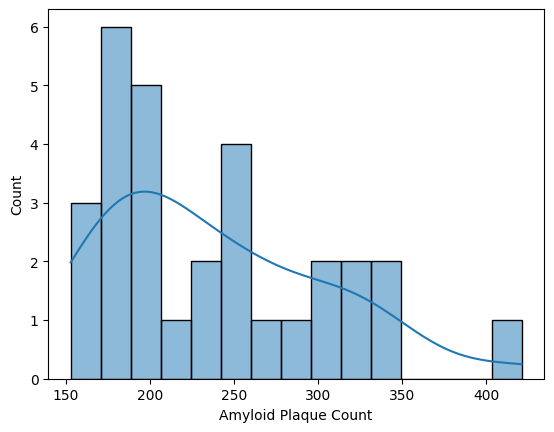

In [95]:
sns.histplot(data=hpc_df, x='Amyloid Plaque Count', bins=15, kde=True)

<Axes: xlabel='Total Amyloid IID', ylabel='Count'>

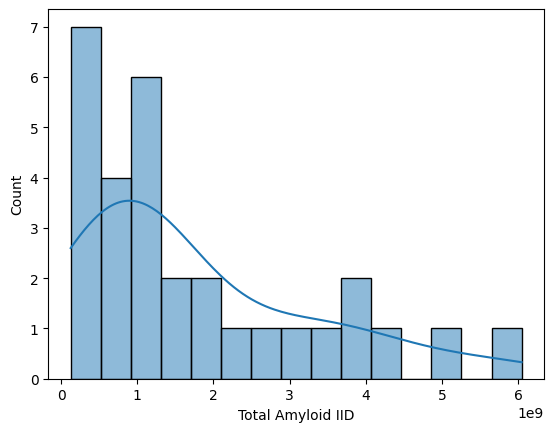

In [96]:
sns.histplot(data=hpc_df, x='Total Amyloid IID', bins=15, kde=True)

<Axes: xlabel='Microglia Count', ylabel='Count'>

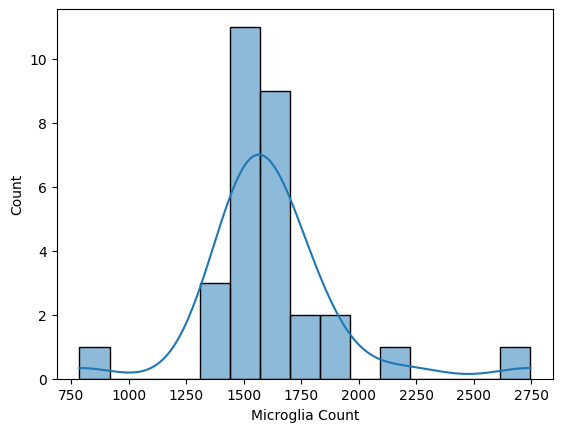

In [99]:
sns.histplot(data=hpc_df, x='Microglia Count', bins=15, kde=True)

<Axes: xlabel='Total Microglia IID', ylabel='Count'>

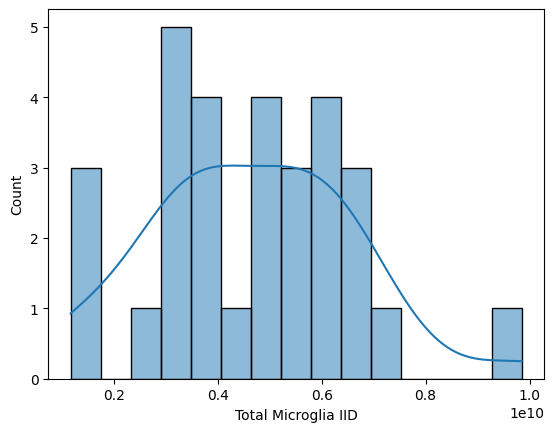

In [100]:
sns.histplot(data=hpc_df, x='Total Microglia IID', bins=15, kde=True)